<center>
<table style="border:none">
    <tr style="border:none">
    <th style="border:none">
        <a  href='https://colab.research.google.com/github/AmirMardan/ml_course/blob/main/6_classical_machine_learning/2_regression_1.ipynb'><img src='https://colab.research.google.com/assets/colab-badge.svg'></a>
    </th>
    <th style="border:none">
        <a  href='https://github1s.com/AmirMardan/ml_course/blob/main/6_classical_machine_learning/2_regression_1.ipynb'><img src='../imgs/open_vscode.svg' height=20px width=115px></a>
    </th>
    </tr>
</table>
</center>


This notebook is created by <a href='https://github.com/AmirMardan'> Amir Mardan</a>. For any feedback or suggestion, please contact me via <a href="mailto:mardan.amir.h@gmail.com">email</a>, (mardan.amir.h@gmail.com).



<a name='top'></a>
# Regression 1

The linear models try to predict the target, $\hat y$, as a function of *bias* ($b$), *weights*, $(w_1, ..., w_n)$, and features in the dataset,
$
\hat y(b, w, x) = b + w_1 x_1 + ... + w_n x_n,
$
where there are $n$ features in the dataset.
The bias can also be presented as $w_0$.


In this notebook, we learned how to use 

- Linear regression
- Regularization
- Decision tree regression
- Learning curve
- Pipeline for processing

However, more regression methods will be added to this course using the next notebooks.

This notebook will cover the following topics:

- [1. Ordinary Linear Regression](#least_square)
- [2. Linear Regression With Regularization](#regularization)
    - [Ridge Regularization](#ridge)
    - [Lasso Regularization](#lasso)
    - [Combined Regularization](#elastic_net)
- [3. A Linear Regression Project](#project)
    - [Exploratory Data Analysis](#eda)
    - [Data Cleaning](#cleaning)
    - [Data Processing Pipeline](#pipeline)
- [4. Training and Evaluation](#training)
    - [Training Curve](#training_curve)

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id='least_square'></a>
## 1. Ordinary Linear Regression

Ordinary least square is the problem of minimizing the following cost function 
$
\min_w \|\mathbf{X}\mathbf{w} - \mathbf{y}\|_2^2,
$

where 
$
\mathbf{\hat y} = \mathbf{X}\mathbf{w}.
$

This can be done using `LinearRegression` in scikit-learn.

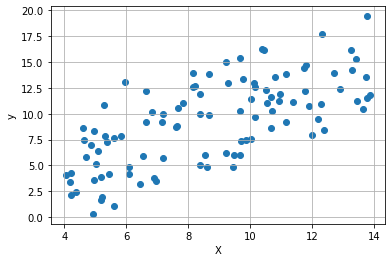

In [242]:
# Let's fake up a dataset

def linear_data(x, rng):
    return 3 * rng.randn(x.shape[0], x.shape[1]) + x

rng = np.random.RandomState(0)

X = 4 + 10 * rng.random((100, 1))
y = linear_data(X, rng)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.grid()

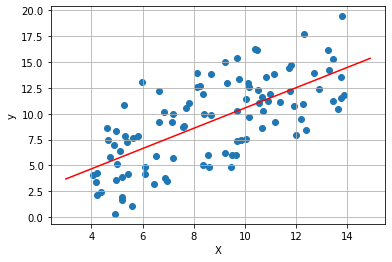

In [243]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

x_test = np.arange(3, 15, .1)
x_test = x_test[:, np.newaxis]
y_est = model.predict(x_test)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)
ax.plot(x_test, y_est, 'r')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.grid()


In [244]:
# Value of w
model.coef_

array([[0.98108051]])

In [245]:
# Value of b
model.intercept_

array([0.74213121])

**Linear regression with more than one feature**

(100, 1)

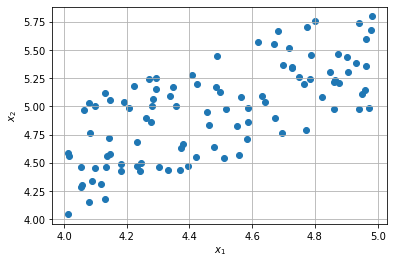

In [246]:
X = 4 + 1.0 * rng.rand(100, 1)
X1 = 1.0 * rng.rand(100, 1) + X
X = np.hstack((X, X1))
y = 5. + 4 * X[:,0] + X[:,1]
y = y[:, np.newaxis]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid()
y.shape


In [247]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)


LinearRegression()

In [248]:
# Compare the coefficients with the true ones.

model.coef_

array([[4., 1.]])

In [249]:
# Compare the intercept with the true one.

model.intercept_

array([5.])

<a id='regularization'></a>
## 2. Linear Regression With Regularization

Regularization is a technique to prevent overfitting. 
This technique shrinks the learned estimates by imposing a penalty on the coefficients.
The cost function of a problem in the presence of regularization is 
$
\min \|\mathbf{X}\mathbf{w} - \mathbf{y}\|_2^2 + \chi_{reg},
$
where $\chi_{reg}$ can be any combination of different types of regularization.

<a id='ridge'></a>
### 2.1 Ridge Regularization

Ridge regression is linear regression by considering a $\ell_2$ penalty on the size of coefficients,
$
\min_w \|\mathbf{X}\mathbf{w} - \mathbf{y}\|_2^2 + \alpha \|\mathbf{w}\|_2^2,
$
where $\alpha$ is called the complexity parameter and it defines the importance of each term.

In [250]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.4, 
              fit_intercept=True)

model.fit(X, y)


print(model.coef_)

[[3.73097214 1.11119842]]


In [251]:
alphas = np.linspace(0, 10, 100)
w = []
for alpha in alphas:
    model = Ridge(alpha=alpha, 
              fit_intercept=True)

    model.fit(X, y)

    w.append(model.coef_)

w = np.array(w)
w = w.reshape(alphas.shape[0], X.shape[1])

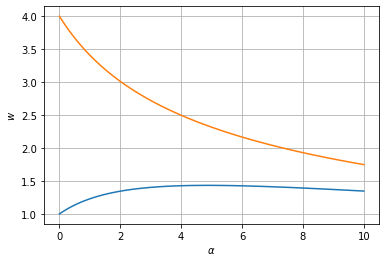

In [252]:
plt.plot(alphas, w[:,1])
plt.plot(alphas, w[:,0])
plt.xlabel(r'$\alpha$')
plt.ylabel('$w$')
plt.grid()

<div class="alert alert-block alert-warning">
<b>Warning:</b> The complexity parameter has usually a small value between 0 to 1.
</div>

<a id='lasso'></a>
### 2.2 Lasso Regularization

The Lasso is a linear model that estimates sparse coefficients by including the $\ell_1$ of coefficients in the regularization term.

In [253]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.4,
              fit_intercept=True)

model.fit(X, y)

print(model.coef_)

[0.         0.65238237]


In [254]:
alphas = np.linspace(0, .4, 100)
w = []
for alpha in alphas:
    model = Lasso(alpha=alpha, 
              fit_intercept=True)

    model.fit(X, y)

    w.append(model.coef_)

w = np.array(w)
w = w.reshape(alphas.shape[0], X.shape[1])

/Users/amir/repos/venv/AI/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/Users/amir/repos/venv/AI/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


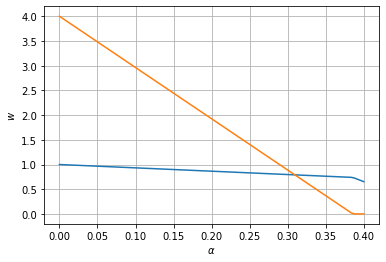

In [255]:
plt.plot(alphas, w[:,1])
plt.plot(alphas, w[:,0])
plt.xlabel(r'$\alpha$')
plt.ylabel('$w$')
plt.grid()

<a id='elastic_net'></a>
### 2.3 Combined Regularization

`ElasticNet` is a linear regression model that takes both $\ell_1$ and $\ell_2$ regularizations into account. 
The cost function of this method is

$
\min_w \frac{1}{n_{samples}}\|\mathbf{X}\mathbf{w} - \mathbf{y}\|_2^2 + \alpha \rho \|\mathbf{w}\|_1 + \frac{\alpha(1 - \rho)}{2}\|\mathbf{w}\|_2^2,
$

where $\rho$ is called $\ell_1$ ratio in sciket-learn.

In [256]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.2,
                   l1_ratio=0.5,
                   fit_intercept=True)

model.fit(X, y)

model.coef_

array([1.33251255, 1.10515676])

There are lots of different methods and you can find them [here](https://scikit-learn.org/stable/modules/linear_model.html).

<a id='project'></a>
## 3. A Linear Regression Project

In [257]:
url = (r'https://raw.githubusercontent.com/AmirMardan/ml_course/main/data/cal_housing.csv')
df = pd.read_csv(url)#,index_col=0, parse_dates=[0])


df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


```
Information about the dataset

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housing_median_age: Median age of a house within a block; a lower number is a newer building

4. total_rooms: Total number of rooms within a block

5. total_bedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. median_house_value (TARGET): Median house value for households within a block (measured in US Dollars)

10. ocean_proximity: Location of the house w.r.t ocean/sea
```

In [258]:
n_samples, n_features = df.shape

print(f'n_samples: {n_samples:} \nn_features: {n_features:}')

n_samples: 20640 
n_features: 10


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<a id='eda'></a>
### 3.1 Exploratory Data Analysis


As mentioned before, the first step is to understand data which is called exploratory data analysis or EDA.

Before starting to analyze the data, let's separate the training and test sets.
We save 10 percent of the samples as test data.

In [260]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df,
                                       test_size=0.1,
                                       shuffle=True,
                                       random_state=1)

print(f'Training data: {train_set.shape}')
print(f'Test data: {test_set.shape}')


Training data: (18576, 10)
Test data: (2064, 10)


**Statistics of the data**

In [261]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,18576.0,-119.569279,2.004341,-124.3500,-121.8000,-118.49000,-118.01000,-114.3100
latitude,18576.0,35.627388,2.133305,32.5400,33.9300,34.25000,37.71000,41.9500
housing_median_age,18576.0,28.639158,12.591420,1.0000,18.0000,29.00000,37.00000,52.0000
total_rooms,18576.0,2637.141365,2173.085530,2.0000,1452.0000,2127.00000,3149.00000,39320.0000
total_bedrooms,18392.0,538.433123,420.920199,1.0000,296.7500,435.00000,646.00000,6445.0000
population,18576.0,1427.633667,1137.569022,3.0000,788.0000,1166.00000,1726.00000,35682.0000
households,18576.0,500.447459,382.795251,1.0000,281.0000,410.00000,604.00000,6082.0000
median_income,18576.0,3.875023,1.899779,0.4999,2.5706,3.54035,4.74685,15.0001
median_house_value,18576.0,207201.995747,115327.233276,14999.0000,120100.0000,180000.00000,265100.00000,500001.0000


**Missing values**

In [262]:
missing = train_set.isna().sum().sort_values(ascending=False)
missing_percent = 100 * missing / train_set.shape[0]

In [263]:
pd.concat([missing, missing_percent], axis=1)

,0,1
total_bedrooms,184,0.990525
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


The values of 184 samples (almost 1 percent) of `total_bedrooms` are missing.

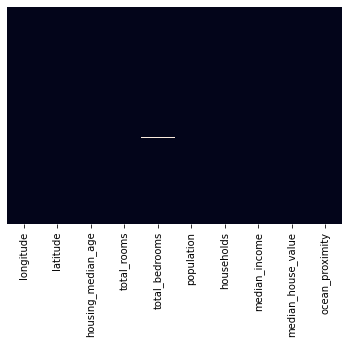

In [264]:
ax = sns.heatmap(train_set.isna(),
            yticklabels=False,
            cbar=False)

**Categorical features**

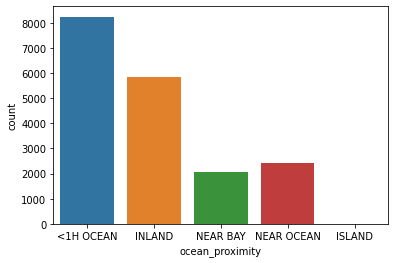

In [265]:
ax = sns.countplot(data=train_set, x='ocean_proximity')

**Correlation between features**

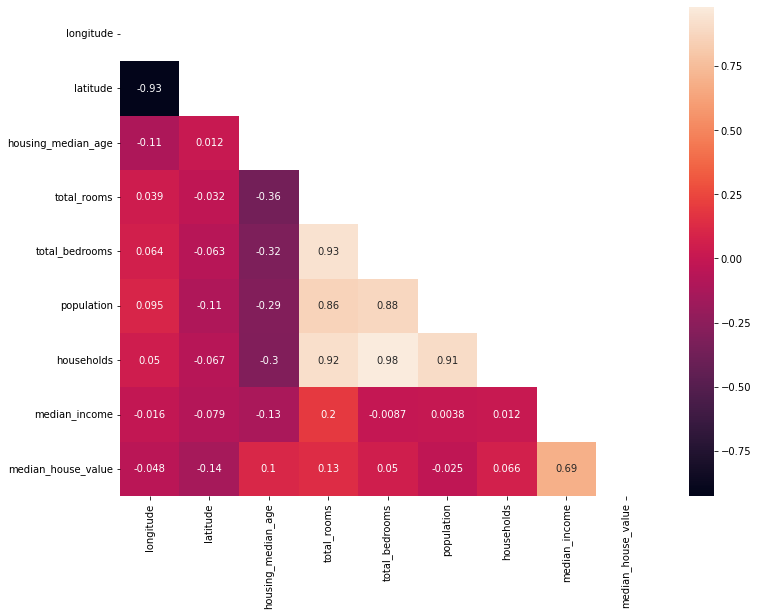

In [266]:
corr = train_set.corr()

mask = np.zeros_like(corr)
triangle = np.triu_indices_from(mask)
mask[triangle] = True 


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
ax = sns.heatmap(corr, annot=True,
                 mask=mask)

As we could expect, the number of `total_rooms`, `total_bedrooms`, `households`, and `population` are highly correlated.

On the other hand, there are some correlations between the `median_income` and `median_house_value` which is reasonable.

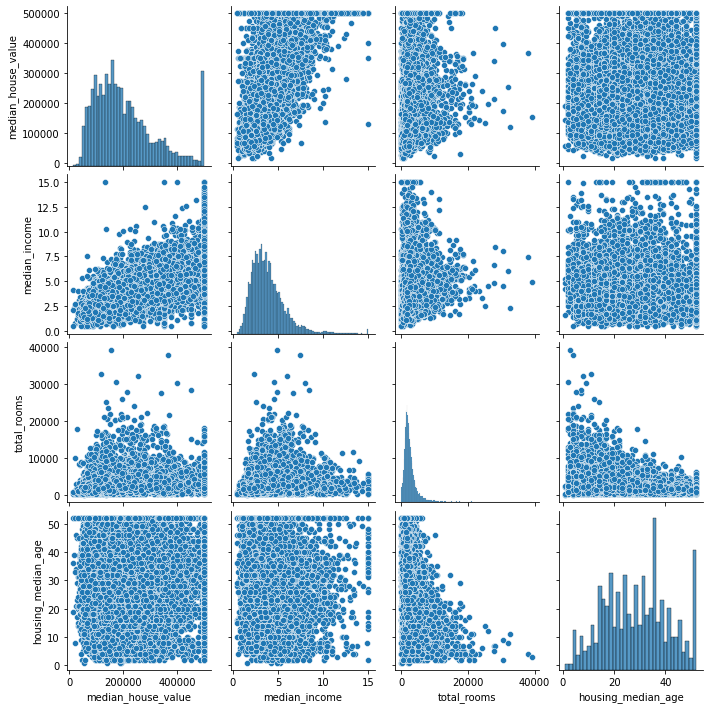

In [267]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

sns.pairplot(train_set[attributes]);

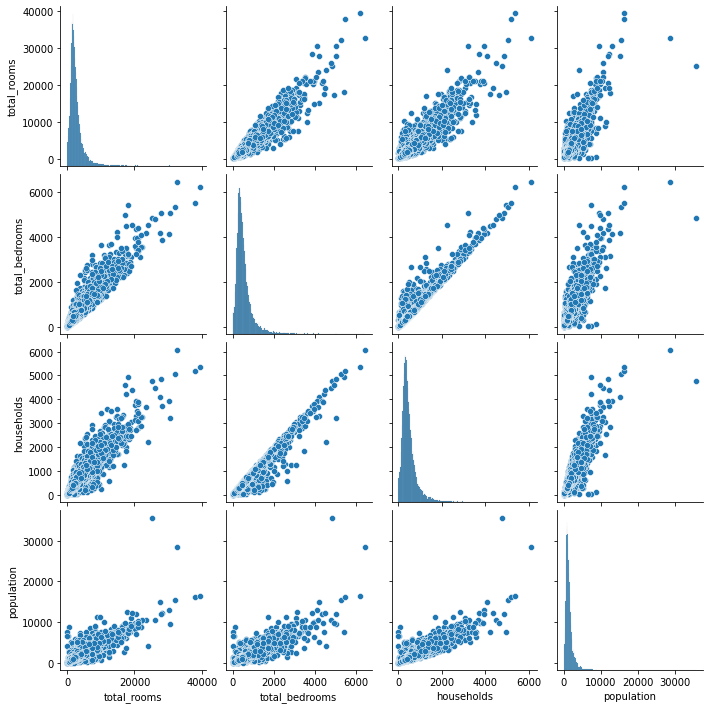

In [268]:
attributes = ['total_rooms', 'total_bedrooms', 'households', 'population']

sns.pairplot(train_set[attributes])

Here again we can see the strong relationship between `total_rooms`, `total_bedrooms`, `households`, and `population` are highly correlated.

**Visualizing Geographical Data**

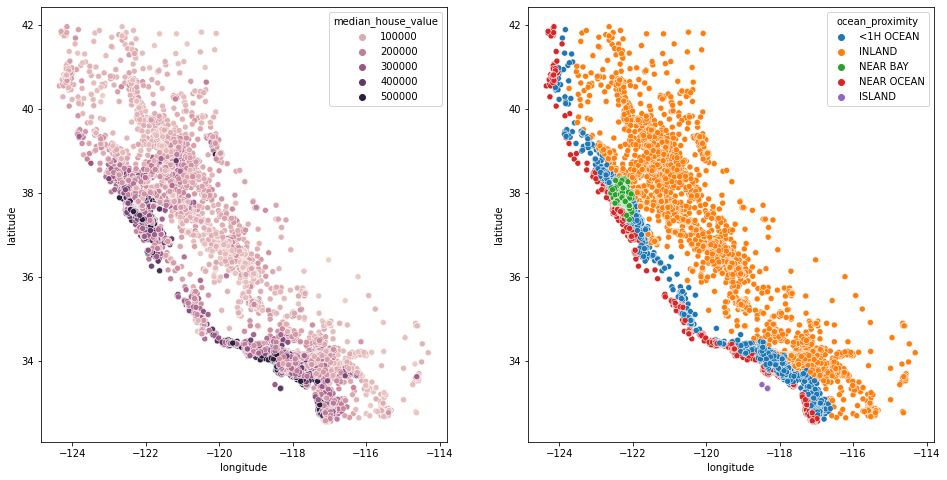

In [269]:
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(121)
sns.scatterplot(data=train_set,
                x='longitude',
                y='latitude', 
                hue='median_house_value')

ax = fig.add_subplot(122)
ax = sns.scatterplot(data=train_set,
                x='longitude',
                y='latitude', 
                hue='ocean_proximity')

We can see that by going far from the ocean, houses become cheaper.

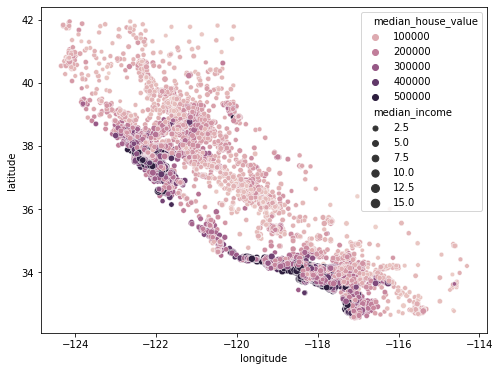

In [270]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
ax = sns.scatterplot(data=train_set,
                x='longitude',
                y='latitude',
                hue='median_house_value',
                size='median_income')

<a id='cleaning'></a>
### 3.2 Data Cleaning

In [271]:
# Check for duplicated samples

train_set.duplicated().sum()

0

**Missing values**

For missing values, we have three options,

- Deleting feature using `housing.dropna(subset=["total_bedrooms"])`,
- Deleting samples with missing values using `housing.drop("total_bedrooms", axis=1)`
- Replace the missing values with another value using `housing["total_bedrooms"].fillna(housing["total_bedrooms"].median())`.

As there is a strong correlation between this feature and `households` (0.98), first option is reasonable. However, for the sake of learning how to impute data, we go with the third option.



In [272]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18576 entries, 5425 to 235
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18576 non-null  float64
 1   latitude            18576 non-null  float64
 2   housing_median_age  18576 non-null  float64
 3   total_rooms         18576 non-null  float64
 4   total_bedrooms      18392 non-null  float64
 5   population          18576 non-null  float64
 6   households          18576 non-null  float64
 7   median_income       18576 non-null  float64
 8   median_house_value  18576 non-null  float64
 9   ocean_proximity     18576 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.1+ MB


In [273]:
# We first seperate the 
train_label = train_set['median_house_value']

train_set.drop(columns='median_house_value', 
                           inplace=True)

train_num = train_set.select_dtypes(['float64'])
train_cat = train_set.select_dtypes(['object'])

In [274]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(train_num)

train_num_imputed = pd.DataFrame(imputer.transform(train_num), columns=train_num.columns)
train_num_imputed.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

We can get access to the median of each using

In [275]:
imputer.statistics_

array([-118.49   ,   34.25   ,   29.     , 2127.     ,  435.     ,
       1166.     ,  410.     ,    3.54035])

**Text and Categorical Features**
This is the time to encode the categorical features.
Here we have only one categorical feature which is not ordinal, so we use `OneHotEncoder`.

In [276]:
train_cat.columns

Index(['ocean_proximity'], dtype='object')

In [277]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
x = encoder.fit_transform(train_cat)
x


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

**Feature scaling**
Before going further, we should scale the numerical features. 
As discussed in the previous notebooks, that can be done using `MinMaxScaler`, `StandardScaler`, or `RobustScaler`.

In [278]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(train_num)
scaled

array([[ 0.57341018, -0.7534936 ,  0.42576502, ..., -0.39966446,
        -0.22845062,  0.57512283],
       [-0.94333858,  1.37940513,  1.85534835, ..., -0.96843646,
        -0.91290805, -0.3772768 ],
       [ 0.73306795, -0.77693205,  0.50518631, ...,  0.51195312,
         0.0354051 , -0.46471038],
       ...,
       [ 0.65323907, -0.79568281,  1.06113539, ..., -0.57372451,
        -0.54194257, -1.4435875 ],
       [ 1.20206263, -0.8894366 , -1.48034609, ..., -0.09198254,
        -0.06125491, -0.65421122],
       [-1.31254717,  1.01376535,  0.50518631, ..., -0.36801717,
        -0.28853658, -0.82718338]])

<a id='pipeline'></a>
### 3.3 Data Processing Pipeline

So far we assessed different processing techniques and there are still more options. 
Scikit-learn provides a `Pipeline` class to perform the sequence of transformations.

In [279]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([ 
                         ('imputer', SimpleImputer(strategy='median')),
                         ('std_scaler', StandardScaler()),
                         ])

num_pipeline_tr = num_pipeline.fit_transform(train_num)
num_pipeline_tr

array([[ 0.57341018, -0.7534936 ,  0.42576502, ..., -0.39966446,
        -0.22845062,  0.57512283],
       [-0.94333858,  1.37940513,  1.85534835, ..., -0.96843646,
        -0.91290805, -0.3772768 ],
       [ 0.73306795, -0.77693205,  0.50518631, ...,  0.51195312,
         0.0354051 , -0.46471038],
       ...,
       [ 0.65323907, -0.79568281,  1.06113539, ..., -0.57372451,
        -0.54194257, -1.4435875 ],
       [ 1.20206263, -0.8894366 , -1.48034609, ..., -0.09198254,
        -0.06125491, -0.65421122],
       [-1.31254717,  1.01376535,  0.50518631, ..., -0.36801717,
        -0.28853658, -0.82718338]])

We can see the steps of the pipeline using `steps`

In [280]:
num_pipeline.steps

[('imputer', SimpleImputer(strategy='median')),
 ('std_scaler', StandardScaler())]

For categorical features, our pipeline has only one step.


In [281]:
cat_pipeline = Pipeline([ 
                         ('encoder', OneHotEncoder(sparse=False))
                         ])

cat_pipeline_tr = cat_pipeline.fit_transform(train_cat)
cat_pipeline_tr

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

**Final Pipeline**

In [283]:
from sklearn.compose import ColumnTransformer

num_features = list(train_num)
cat_features = list(train_cat)

final_pipeline = ColumnTransformer([
                ('num', num_pipeline, num_features),
                ('cat', cat_pipeline, cat_features)
                         ])

final_pipeline.fit(train_set)
processed_training_data = final_pipeline.transform(train_set)

processed_training_data.shape

(18576, 13)

Now, we send the test data through the pipeline.

In [284]:
test_label = test_set['median_house_value']

test_set.drop(columns='median_house_value', 
                           inplace=True)

In [285]:
processed_test_data = final_pipeline.transform(test_set)
processed_test_data.shape

(2064, 13)

Now, the training data is ready and we need to go ahead with choosing the model and train it.

<a id='training'></a>
## 4. Training and Evaluation

**Linear Regression**

Let's train the model using linear regression.

In [286]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(processed_training_data, train_label)



LinearRegression()

Let's evaluate the model.
We can evaluate the model using mean-squares error

$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$

where $\hat{y}$ is the predicted label.
By taking the square root of this error, we calculate the root-mean-squares error (RMSE).



In [287]:
from sklearn.metrics import mean_squared_error

predicted_training_labels = lin_reg.predict(processed_training_data)

np.sqrt(mean_squared_error(predicted_training_labels, train_label))

68672.91962542155

As mentioned in the previous notebooks, we can evaluate the model using cross-validation.

In [288]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lin_reg, processed_training_data,
                            train_label,
                            scoring='neg_root_mean_squared_error',
                            cv=5)

np.mean(- cv_scores)

68837.70975840204

Let's train a decision tree model.

In [289]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(processed_training_data, train_label)



DecisionTreeRegressor()

In [290]:
cv_scores = cross_val_score(tree_reg, processed_training_data,
                            train_label,
                            scoring='neg_root_mean_squared_error',
                            cv=5)

np.mean(- cv_scores)

68295.7146082048

Now, it's time to evaluate the models using the test set. 
For linear regression, we have

In [291]:
y_pred_lin = lin_reg.predict(processed_test_data)

rmse_lin = np.sqrt(mean_squared_error(test_label, y_pred_lin))
rmse_lin

69066.93540849151

For decision tree,

In [292]:
y_pred_tree = tree_reg.predict(processed_test_data)

rmse_tree = np.sqrt(mean_squared_error(test_label, y_pred_tree))
rmse_tree

66108.43040550323

<a id='training_curve'></a>
### 4.1 Training Curve

In [293]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def score_estimator(estimator, x, y):
    return np.sqrt(mean_squared_error(y, estimator.predict(x)))
    
    
def plot_learning_curves(model, data, label):

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    
    train_sizes, train_scores, valid_scores = learning_curve(model, data,
                                                             label, cv=cv,
                                                             train_sizes=np.linspace(0.05, 1, 10),
                                                             scoring=score_estimator
                                                             )

    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training set")

    ax.plot(train_sizes, valid_scores_mean, 'o-', color="b",
                 label="Validation set")
    ax.set_xlabel('Training size')
    ax.set_ylabel('RMSE')
    
    plt.legend()
    ax.grid()
    return ax

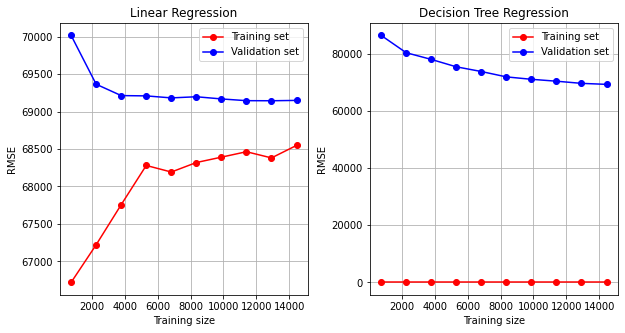

In [307]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)

ax = plot_learning_curves(lin_reg,
                     np.vstack((processed_training_data, processed_test_data)),
                     pd.concat([train_label, test_label], axis=0)
                     )
ax.set_title('Linear Regression')

ax = fig.add_subplot(122)
plot_learning_curves(tree_reg,
                     np.vstack((processed_training_data, processed_test_data)),
                     pd.concat([train_label, test_label], axis=0)
                     )
ax.set_title('Decision Tree Regression')

plt.subplots_adjust(wspace=.25)


It's clear that increasing the training size, improves the linear regression.
Also, the overfitting of the decision tree is obvious.

### [TOP ☝️](#top)